# 

Among a variety of possibilities, we can, for example, look at the
frequencies of the words contained in the corpus or examine the corpus
for recurring themes it contains.

First we need to import all the required libraries once again. The
[Natural Language Toolkit (NLTK)](https://www.nltk.org/howto.html) gives
us access to a variety of natural language processing functions
(e.g. tokenisation, stop word removal, part-of-speech tagging, …).

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.

When analysing word frequencies, we can use stop word lists to ignore
words that occur frequently but are not relevant to us. We can easily
download such a list. However, this can also be individually adapted to
the purpose.

In [5]:
# Retrieve Stopwords from Github
sw_json = requests.get('https://github.com/stopwords-iso/stopwords-de/raw/master/stopwords-de.json')

Now we can tokenise the existing text, remove the stop words or
punctuation marks they contain, convert the words to lower case, or use
bi-grams in addition to single-word tokens.

We then sum up the occurrences of the individual words and make the
results available in a DataFrame.

In [7]:
def word_freq(text, punctuation=False, stop_words = False, lowercasing = False, bigrams = False):

    if punctuation:
        # Tokenizing, removing punctuation
        tokens = RegexpTokenizer(r'\w+').tokenize(text) # https://regexr.com/
    else:
        # Tokenizing, w/o removing punctuation
        # tokens = text.split()
        tokens = word_tokenize(text)

    if stop_words:
        # Removing Stopwords
        tokens = [w for w in tokens if not w.lower() in stop_words]

    if lowercasing:
        # Lower-Casing
        tokens = [w.lower() for w in tokens]

    if bigrams:
        # Converting text tokens into bigrams
        tokens = nltk.bigrams(tokens)

    # Creating Data Frame
    freq = nltk.FreqDist(tokens) # display(freq)
    df = pd.DataFrame.from_dict(freq, orient='index')
    df.columns = ['Frequency']
    df.index.name = 'Term'

    # Here we calculate the total number of tokens in our Frequency List
    total_tokens = sum(freq.values()) # sum([2,3,4,5,6])

    # Here we add a new column `Relative` (*100 for percentage)
    df['Relative'] = (df['Frequency'] / total_tokens) * 100

    return df

In [17]:
from pathlib import Path
import os

#@markdown Do you want bigrams included?
bigrams = True #@param {type:"boolean"}

#@markdown Should all words get lower cased before counting the occurances?
lowercasing = True #@param {type:"boolean"}

#@markdown Do you want to exclude stopwords in your result list?
stopwords = True #@param {type:"boolean"}

#@markdown Do you want to remove punctuation before counting the occurances?
punctuation = True #@param {type:"boolean"}

In [18]:
# Load stopwords file if necessary
if stopwords:
    stopwords = sw_json.json()

# Read source file and concat all texts
text = ' '.join(list(df[text_column]))

# Call word_freq() with specified parameters
df_freq = word_freq(text, punctuation = punctuation, stop_words = stopwords, lowercasing = lowercasing, bigrams = bigrams)

# Sort results for descending values
df_freq = df_freq.sort_values("Relative", ascending = False)

display(df_freq[0:10])

**Wordcloud**

One way to visualise word frequencies and recurring themes of texts are
word clouds. These basically show the most frequently occurring words in
the text (similar to the table created earlier), but more frequently
occurring words are depicted larger than less frequently occurring
words.

First, we have to install the necessary library `wordcloud`.

In [10]:
!pip install -q wordcloud

The actual implementation of this approach is relatively simple. We need
to combine all the texts into a single text, as we did in the previous
step with the frequency analysis, and pass it to the imported library.

In [11]:
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(text, path):

    text = ' '.join(list(text))

    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(text)

    # Dazugehörige Grafik erstellen
    plt.imshow(wordcloud, interpolation="bilinear") # Auflösung/Interpolation der Grafik
    plt.axis("off")
    plt.figtext(0.5, 0.1, wordcloud_subcaption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig(path, dpi=300)
    plt.show()

Once again, we have the option of adjusting various parameters. Remember
to specify the right file path, file name and column of your text data!

In [12]:
#@markdown Input for additional stopwords; whitespace separated
stopwords_extension_wc = '' #@param {type: "string"}

#@markdown Subcaption for the wordcloud, leave blank to ignore
wordcloud_subcaption = 'Markus S\xF6der' #@param {type: "string"}

Now all we have to do is load the stop word file, add our own additions
and then trigger the creation of the word cloud using the function we
created at the beginning.

The result image is saved in the defined `data_path`.

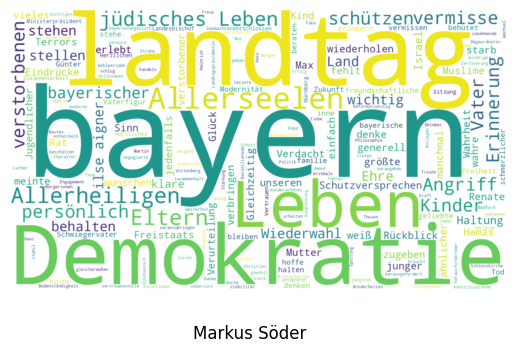

In [14]:
import matplotlib.pyplot as plt
import requests

# Retrieve Stopwords from Github
r = requests.get('https://github.com/stopwords-iso/stopwords-de/raw/master/stopwords-de.json')
stop_words = r.json()

# Convert input into list
stopwords_extension_wc_list = stopwords_extension_wc.split(' ')
stop_words.extend(stopwords_extension_wc_list)

# Stopwörter in die WordCloud laden
STOPWORDS.update(stop_words)


generate_wordcloud(df[text_column], 'wordcloud.png')